# 1. Getting VizDoom Up and Running

In [1]:
!pip install vizdoom

In [2]:
!cd github & git clone https://github.com/mwydmuch/ViZDoom

fatal: destination path 'ViZDoom' already exists and is not an empty directory.


In [3]:
# Import vizdoom for game env
from vizdoom import *
# Import random for action sampling
import random
# Import time for sleeping
import time
# Import numpy for identity matrix
import numpy as np

C:\Users\dilan\anaconda3\envs\deep-learning\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dilan\anaconda3\envs\deep-learning\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\dilan\anaconda3\envs\deep-learning\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# Setup game
game = DoomGame()
game.load_config('github/ViZDoom/scenarios/basic.cfg')
game.init()

In [5]:
actions = np.identity(3, dtype=np.uint8)

In [6]:
random.choice(actions)

array([0, 0, 1], dtype=uint8)

In [7]:
episodes = 10
for episode in range(episodes):
    game.new_episode()
    while not game.is_episode_finished():
        state = game.get_state()
        img = state.screen_buffer
        info = state.game_variables
        reward = game.make_action(random.choice(actions))
        print('reward :', reward)
        time.sleep(0.02)
    print('Result: ', game.get_total_reward())
    time.sleep(2)

reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : 100.0
reward : -1.0
Result:  95.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : 100.0
reward : -1.0
Result:  95.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : 100.0
reward : -1.0
Result:  93.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -6.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : 100.0
reward : -1.0
Result:  75.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : 100.0
reward : -1.0
Result:  95.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : 100.0
reward : -1.0
Result:  95.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : 100.0
reward : -1.0
Result:  94.0
reward : -1.0
reward : -1.0
reward : -1.0
reward : -1.0

In [8]:
game.close()

# 2. Converting it to a Gym Environment

In [9]:
!pip install gym

In [10]:
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces
from gym.spaces import Discrete, Box
# Import opencv
import cv2

In [81]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env):
    # Function that is called when we start the env
    def __init__(self, render=False):
        # Setup the game
        self.game = DoomGame()
        self.game.load_config('github/VizDoom/scenarios/basic.cfg')
        
        # Render frame set visibility
        if render == False:
            self.game.set_window_visible(False)
        else: 
            self.game.set_window_visible(True)
            
        # Start the game
        self.game.init()
        
        # Create the action space and observation space
        self.observation_space = Box(low=0, high=255, shape=(3,240,320), dtype=np.uint8)
        self.action_space = Discrete(3)
        
    # take a step in the environment
    def step(self, action):
        # Specifiy action and take step
        actions = np.identity(3, dtype=np.uint8)
        reward = self.game.make_action(actions[action], 4)
        
        # Get all other stuff that need to return
        if self.game.get_state():
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            info = self.game.get_state().game_variables
        else:
            state = np.zeros(self.observation_space.shape)
            info = 0
    
        done = self.game.is_episode_finished()
        
        return img, reward, done, info
    
    # Render the game environment
    def render():
        pass
    
    # start new gamer
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # convert frame to gray scale and resize
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return gray
    
    # close the game
    def close(self):
        self.game.close()

In [82]:
env = VizDoomGym(render=True)

In [83]:
state = env.reset()

In [84]:
state.shape

(240, 320)

In [85]:
env.observation_space.sample().shape

(3, 240, 320)

In [86]:
env.step(2)

(array([[[67, 79, 67, ..., 39, 39, 39],
         [55, 67, 79, ..., 55, 55, 47],
         [67, 67, 91, ..., 67, 67, 59],
         ...,
         [19, 19, 11, ..., 47, 47, 55],
         [19, 27, 19, ..., 47, 47, 47],
         [11, 19, 19, ..., 27, 19, 19]],
 
        [[67, 79, 67, ..., 39, 39, 39],
         [55, 67, 79, ..., 55, 55, 47],
         [67, 67, 91, ..., 67, 67, 59],
         ...,
         [19, 19, 11, ..., 47, 47, 55],
         [19, 27, 19, ..., 47, 47, 47],
         [11, 19, 19, ..., 27, 19, 19]],
 
        [[67, 79, 67, ..., 39, 39, 39],
         [55, 67, 79, ..., 55, 55, 47],
         [67, 67, 91, ..., 67, 67, 59],
         ...,
         [19, 19, 11, ..., 47, 47, 55],
         [19, 27, 19, ..., 47, 47, 47],
         [11, 19, 19, ..., 27, 19, 19]]], dtype=uint8),
 -4.0,
 False,
 array([50.]))

In [87]:
env.close()

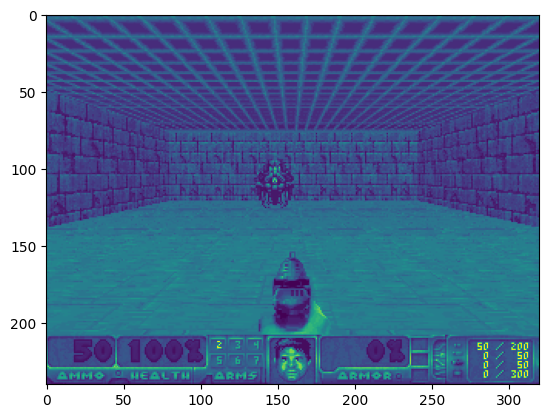

In [88]:
from matplotlib import pyplot as plt
plt.imshow(state)